# Logistic Regression

In [65]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report

import warnings
warnings.filterwarnings('ignore')


In [10]:
data=pd.read_csv(r'https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.shape

(768, 9)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Replacing 0 

In [25]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

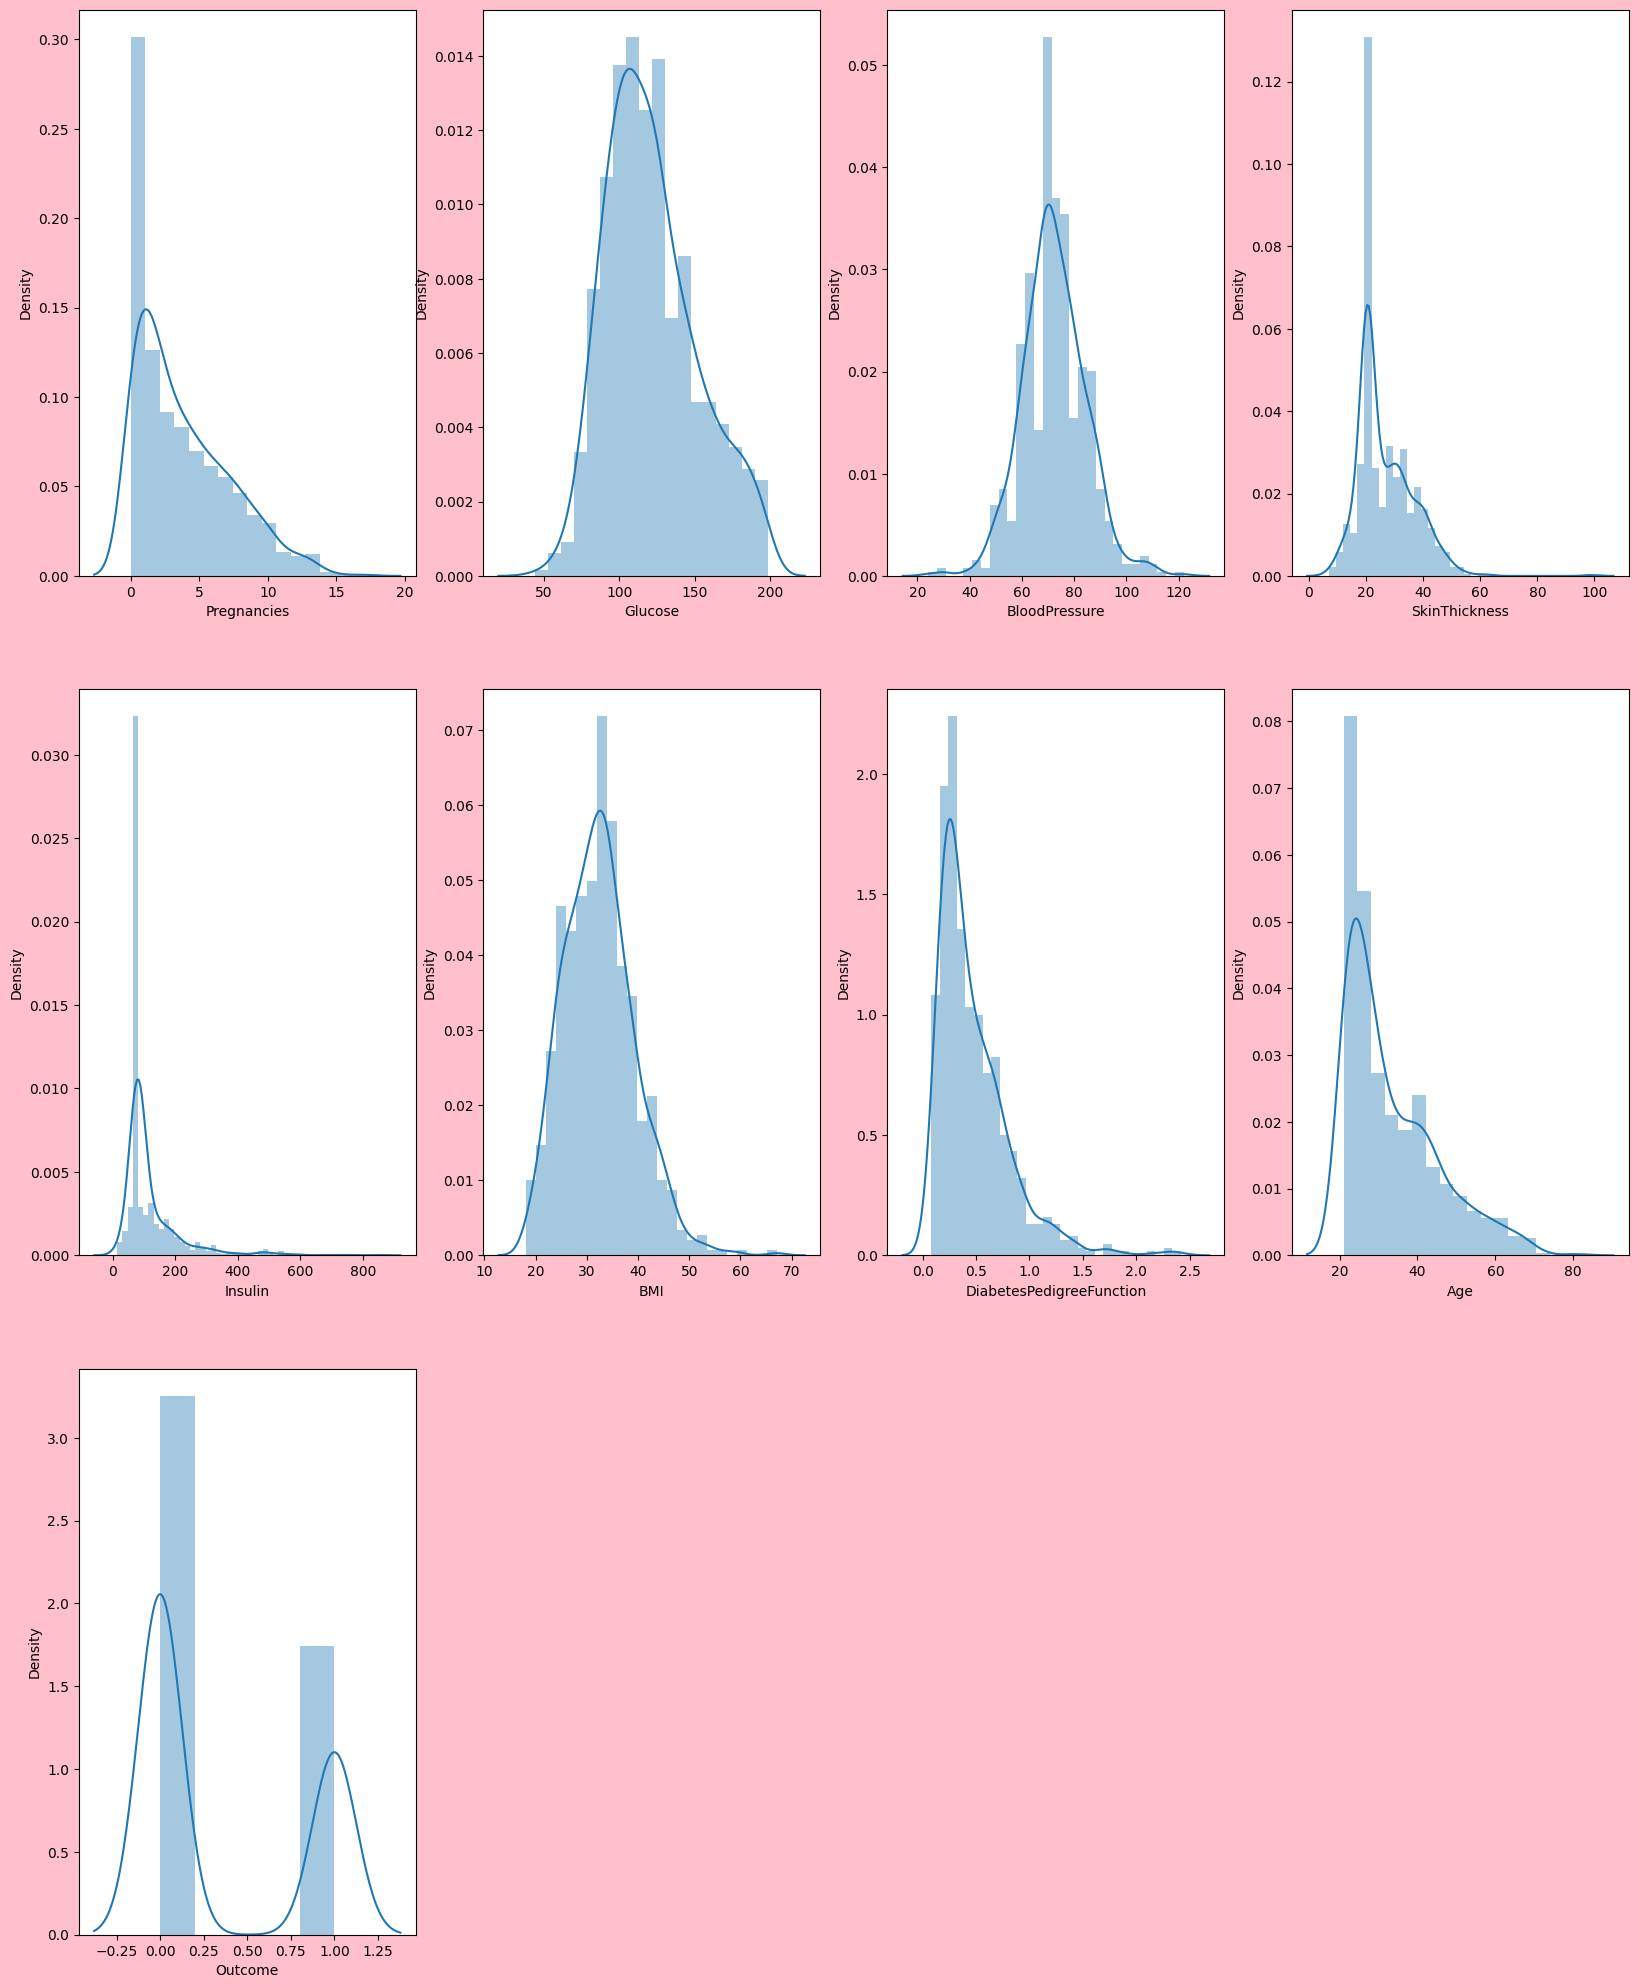

In [26]:
plt.figure(figsize=(20,25),facecolor='pink')
plotnumber=1
for column in data.columns:
    if plotnumber<=9:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

## Outliers Deduction

In [27]:
features=data.drop(columns=['Outcome'])
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


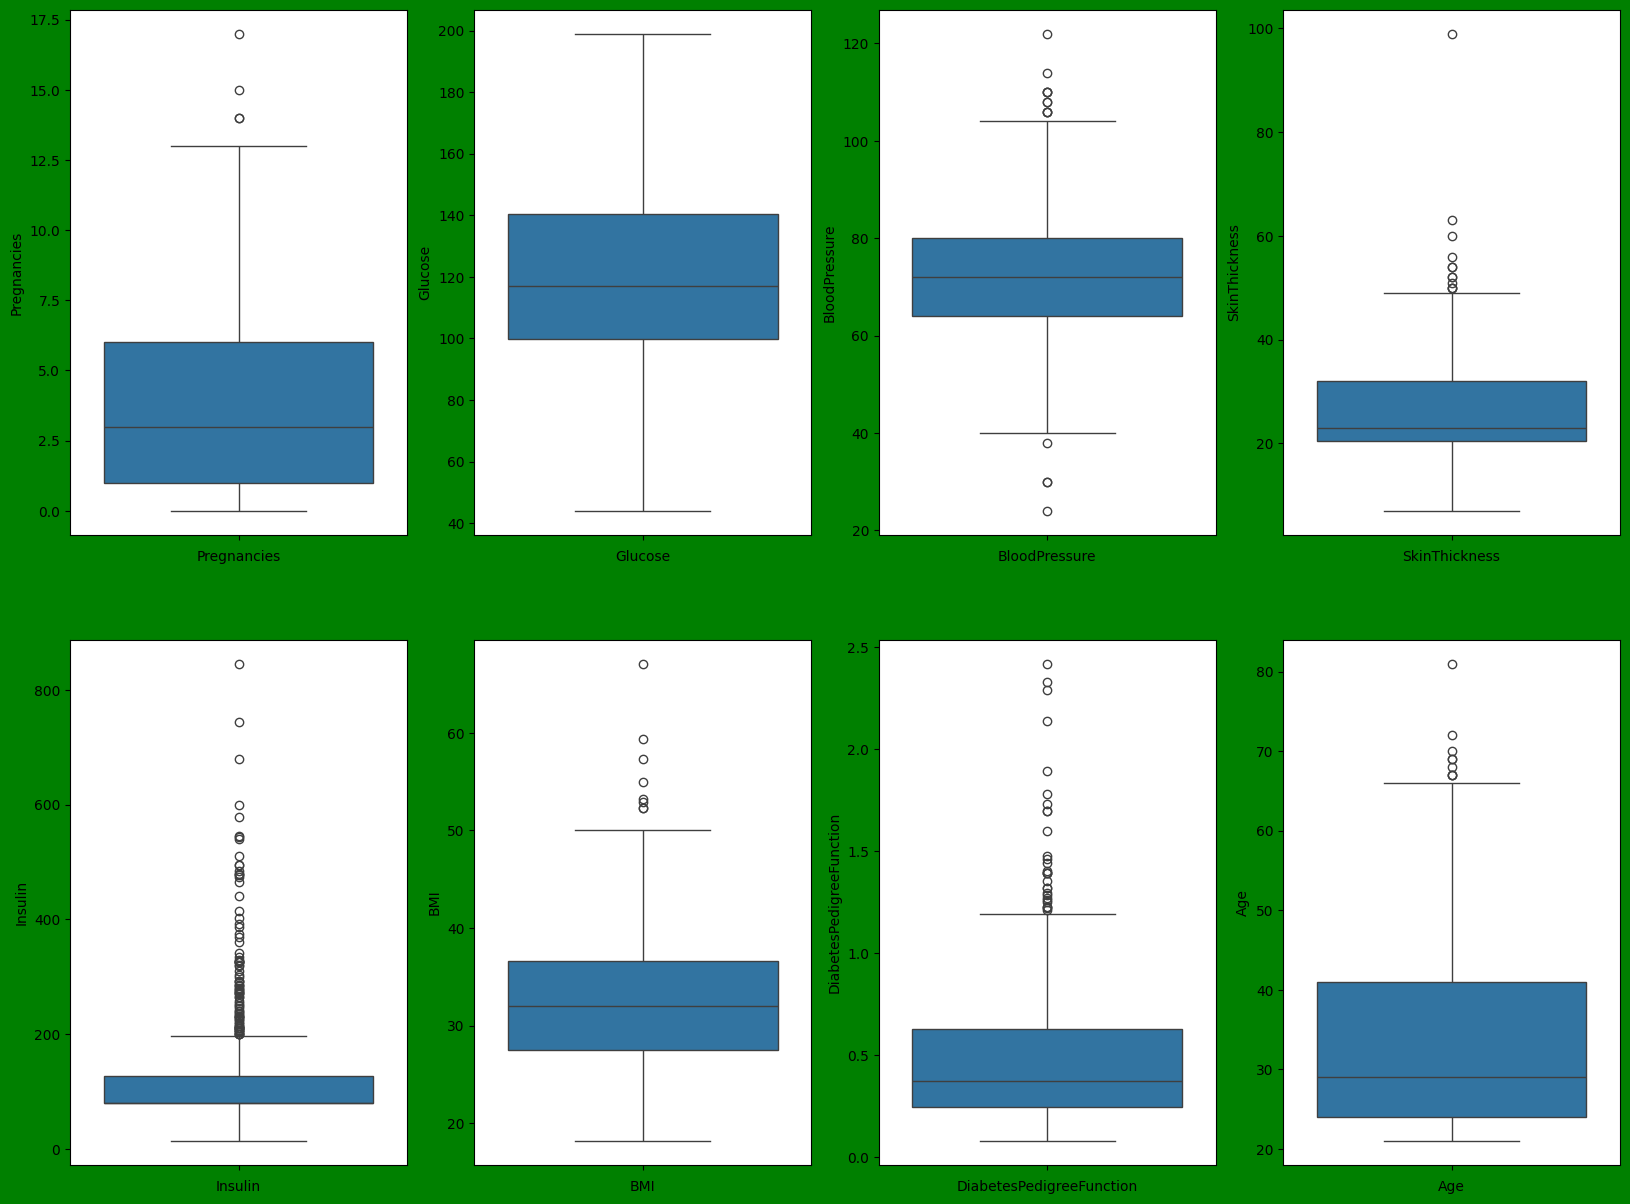

In [28]:
plt.figure(figsize=(20,15),facecolor='green')
plotnumber=1
for i in features:
    if plotnumber<9:
        ax=plt.subplot(2,4,plotnumber)
        sns.boxplot(data[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

## Outlier Handling - InterQuantile Range

In [30]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

In [37]:
High_preg=Q3.Pregnancies+(1.5*IQR.Pregnancies)
index=np.where(data['Pregnancies']>High_preg)
data=data.drop(data.index[index])
data.reset_index

<bound method DataFrame.reset_index of      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  

In [40]:
Low_preg=Q1.Pregnancies-(1.5*IQR.Pregnancies)
index=np.where(data['Pregnancies']<Low_preg)
data=data.drop(data.index[index])
data.reset_index

<bound method DataFrame.reset_index of      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  

In [42]:
High_BP=Q3.BloodPressure+(1.5*IQR.BloodPressure)
index=np.where(data['BloodPressure']>High_BP)
data=data.drop(data.index[index])
data.reset_index

<bound method DataFrame.reset_index of      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  

In [43]:
Low_BP=Q1.BloodPressure-(1.5*IQR.BloodPressure)
index=np.where(data['BloodPressure']<Low_BP)
data=data.drop(data.index[index])
data.reset_index

<bound method DataFrame.reset_index of      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  

In [44]:
High_ST=Q3.SkinThickness+(1.5*IQR.SkinThickness)
index=np.where(data['SkinThickness']>High_ST)
data=data.drop(data.index[index])
data.reset_index

<bound method DataFrame.reset_index of      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  

In [45]:
High_In=Q3.Insulin+(1.5*IQR.Insulin)
index=np.where(data['Insulin']>High_In)
data=data.drop(data.index[index])
data.reset_index

<bound method DataFrame.reset_index of      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  

In [46]:
High_BMI=Q3.BMI+(1.5*IQR.BMI)
index=np.where(data['BMI']>High_BMI)
data=data.drop(data.index[index])
data.reset_index

<bound method DataFrame.reset_index of      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  

In [47]:
High_Dia=Q3.DiabetesPedigreeFunction+(1.5*IQR.DiabetesPedigreeFunction)
index=np.where(data['DiabetesPedigreeFunction']>High_Dia)
data=data.drop(data.index[index])
data.reset_index

<bound method DataFrame.reset_index of      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
5              5    116.0           74.0      20.536458   79.799479  25.6   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  

In [48]:
High_Age=Q3.Age+(1.5*IQR.Age)
index=np.where(data['Age']>High_Age)
data=data.drop(data.index[index])
data.reset_index

<bound method DataFrame.reset_index of      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
5              5    116.0           74.0      20.536458   79.799479  25.6   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  

# Seperating features and target

In [51]:
x=data.drop(columns=['Outcome'])
y=data['Outcome']

In [52]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30


#  Features VS Target

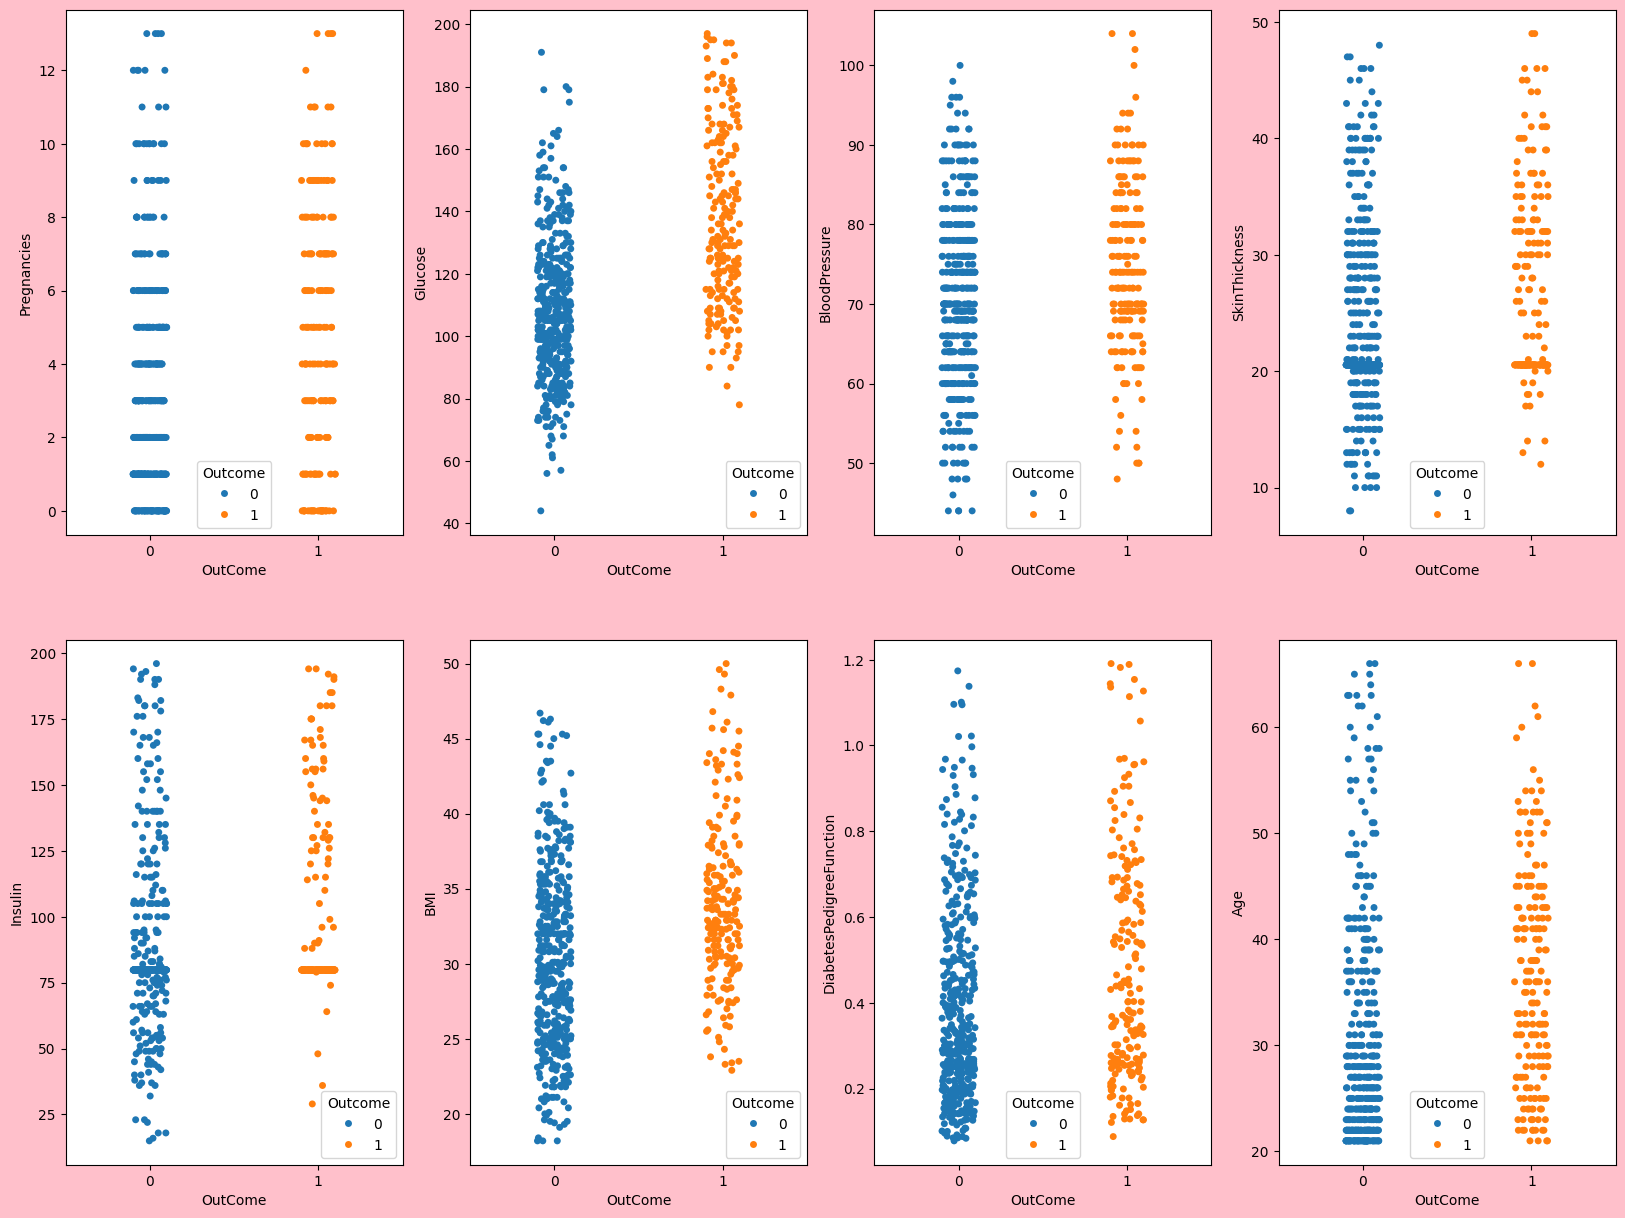

In [57]:
plt.figure(figsize=(20,15),facecolor='Pink')
plotnumber=1
for i in x:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.stripplot(x=y,y=x[i],hue=y)
        plt.xlabel('OutCome')
        plt.ylabel(i)
    plotnumber+=1
plt.show()

    

# Standardization

In [58]:
scaler=StandardScaler()

In [59]:
x_scaled=scaler.fit_transform(x)

# Multicolinearity check

In [79]:
vif=pd.DataFrame()

In [81]:
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [83]:
vif['features']=x.columns

In [84]:
vif

,vif,features
0,1.448654,Pregnancies
1,1.250247,Glucose
2,1.258898,BloodPressure
3,1.411508,SkinThickness
4,1.200759,Insulin
5,1.447599,BMI
6,1.038530,DiabetesPedigreeFunction
7,1.659799,Age


## Seperating test, train

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=245)

# Building model

In [61]:
log_reg=LogisticRegression()

In [62]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [64]:
y_pred=log_reg.predict(x_test)

# Evaluation Metrics

In [68]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7677419354838709

In [70]:
con_mat=confusion_matrix(y_test,y_pred)
con_mat

array([[93, 16],
       [20, 26]], dtype=int64)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       109
           1       0.62      0.57      0.59        46

    accuracy                           0.77       155
   macro avg       0.72      0.71      0.71       155
weighted avg       0.76      0.77      0.76       155



In [74]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

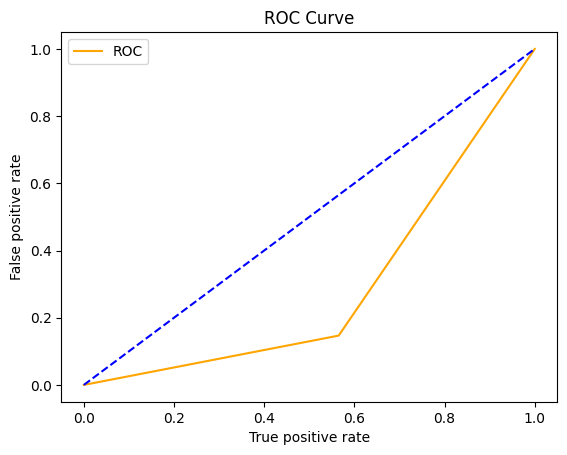

In [76]:
plt.plot(tpr,fpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [78]:
auc=roc_auc_score(y_test,y_pred)
auc

0.7092142002393298